In [1]:
import networkx as nx

##### Q1) Load dataset and output number of nodes and edges and the average degree of G

In [2]:
G = nx.read_edgelist('facebook_clean_data/government_edges.txt', delimiter=',')

In [3]:
## Removing first two lines


G.remove_node(n = 'node_1')
G.remove_node(n = 'node_2')


In [4]:
print("The number of Nodes are:", G.number_of_nodes(), \
      "\nThe number of Edges are:", G.number_of_edges())



The number of Nodes are: 7057 
The number of Edges are: 89455


In [5]:
degrees = [val for (node, val) in G.degree()]                       #Extracting all degrees using list comprehension
sum_of_all_degrees = sum(degrees)
average_degree_of_G = sum_of_all_degrees/G.number_of_nodes()

# print("The number of nodes are:", len(degrees))
print("The number of nodes are:", G.number_of_nodes())
print("The sum of degrees of all nodes are:", sum_of_all_degrees)
print("The average degree of the graph:", average_degree_of_G)

The number of nodes are: 7057
The sum of degrees of all nodes are: 178910
The average degree of the graph: 25.352132634263853


##### Q2) Make a random graph with the same number of nodes and expected mean degree

In [6]:
seed = 5555
number_of_nodes = G.number_of_nodes()
probability_of_edge_creation = average_degree_of_G/(number_of_nodes-1)

G_random = nx.gnp_random_graph(n = number_of_nodes, p =  probability_of_edge_creation, seed = seed, directed=False)

In [7]:
print("The number of Nodes are:", G_random.number_of_nodes(), \
      "\nThe number of Edges are:", G_random.number_of_edges())


The number of Nodes are: 7057 
The number of Edges are: 89462


In [8]:
degrees_random = [val for (node, val) in G_random.degree()]
sum_of_all_degrees_random = sum(degrees_random)
average_degree_of_G_random = sum_of_all_degrees_random/len(degrees_random)

# print("The number of nodes are:", len(degrees_random))
print("The number of nodes are:", G_random.number_of_nodes())
print("The sum of degrees of all nodes are:", sum_of_all_degrees_random)
print("The average degree of the graph:", average_degree_of_G_random)

The number of nodes are: 7057
The sum of degrees of all nodes are: 178924
The average degree of the graph: 25.35411648009069


In [9]:
nx.write_edgelist(G=G_random, path= "random.csv", delimiter=',', data=False)

##### Q3) Plot the degree histograms of both G and G_random in linear-linear and log-log scale

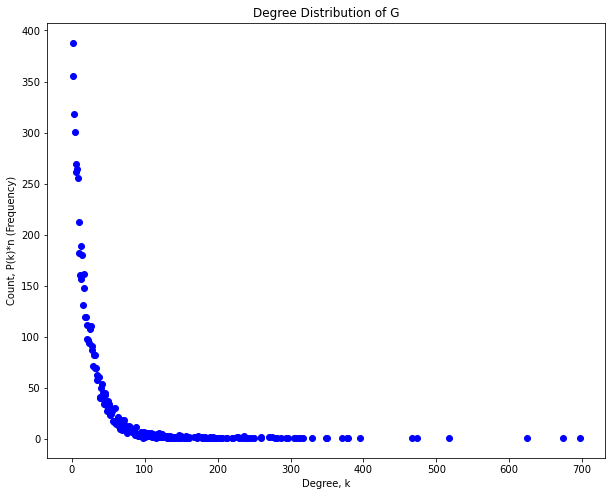

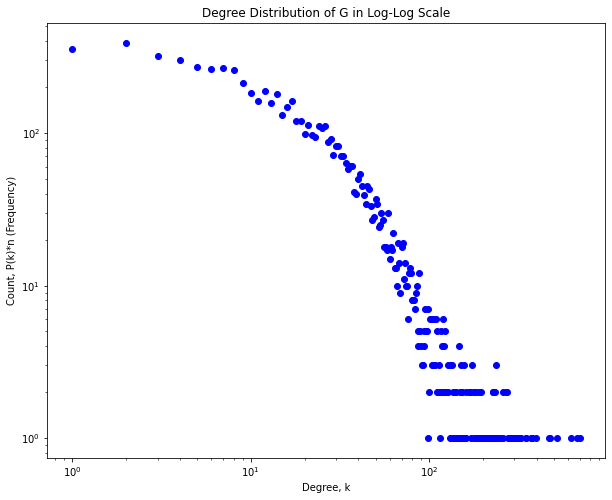

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

degree_seq = [d for n, d in G.degree()]
degree_freq = Counter(degree_seq)

x, y = zip(*degree_freq.items())

plt.figure(figsize=(10, 8))  
plt.plot(x,y, 'bo')
plt.xlabel('Degree, k')
plt.ylabel('Count, P(k)*n (Frequency)')
plt.title('Degree Distribution of G')
plt.show()

plt.figure(figsize=(10, 8))  
plt.loglog(x,y, 'bo')
plt.xlabel('Degree, k')
plt.ylabel('Count, P(k)*n (Frequency)')
plt.title('Degree Distribution of G in Log-Log Scale')
plt.show()

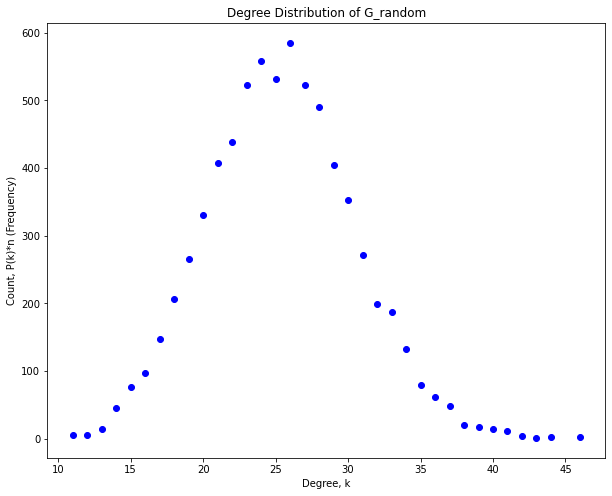

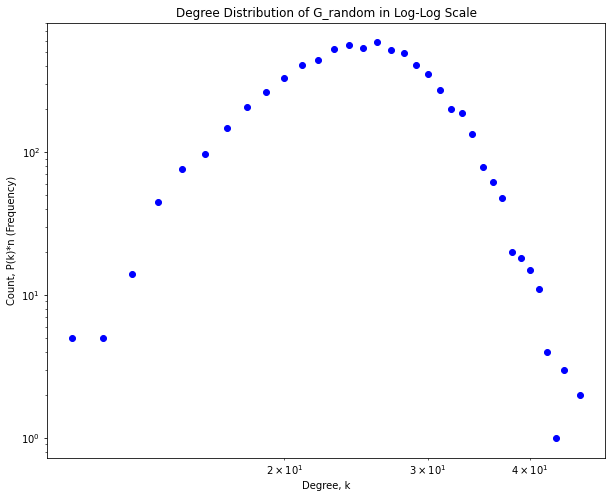

In [35]:


degree_seq_random = [d for n, d in G_random.degree()]
degree_freq_random = Counter(degree_seq_random)

x, y = zip(*degree_freq_random.items())

plt.figure(figsize=(10, 8))  
plt.plot(x,y, 'bo')
plt.xlabel('Degree, k')
plt.ylabel('Count, P(k)*n (Frequency)')
plt.title('Degree Distribution of G_random')
plt.show()

plt.figure(figsize=(10, 8))  
plt.loglog(x,y, 'bo')
plt.xlabel('Degree, k')
plt.ylabel('Count, P(k)*n (Frequency)')
plt.title('Degree Distribution of G_random in Log-Log Scale')
plt.show()

##### Q4) Plot the number of paths versus the (shortest) path distance for G and G_random

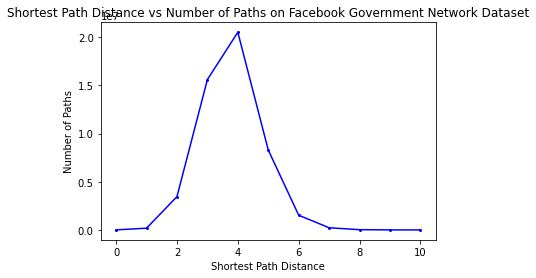

In [14]:
distance_seq = []
path_len = nx.all_pairs_shortest_path_length(G)
for source, targets in path_len:
    for target, dist in targets.items():
        distance_seq.append(dist)

distance_counts = {}
for dist in set(distance_seq):
    distance_counts[dist] = distance_seq.count(dist)

x = list(distance_counts.keys())
y = list(distance_counts.values())
plt.plot(x, y, 'bo-', markersize=2)
plt.xlabel('Shortest Path Distance')
plt.ylabel('Number of Paths')
plt.title('Shortest Path Distance vs Number of Paths on Facebook Government Network Dataset')
plt.show()

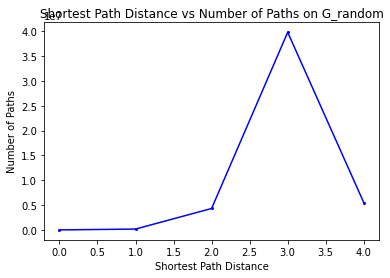

In [36]:
distance_seq_random = []
path_len_random = nx.all_pairs_shortest_path_length(G_random)
for source, targets in path_len_random:
    for target, dist in targets.items():
        distance_seq_random.append(dist)

distance_counts_random = {}
for dist in set(distance_seq_random):
    distance_counts_random[dist] = distance_seq_random.count(dist)

x = list(distance_counts_random.keys())
y = list(distance_counts_random.values())
plt.plot(x, y, 'bo-', markersize=2)
plt.xlabel('Shortest Path Distance')
plt.ylabel('Number of Paths')
plt.title('Shortest Path Distance vs Number of Paths on G_random')
plt.show()

##### Q5) Plot the average clustering coefficient versus degree in log-log scale

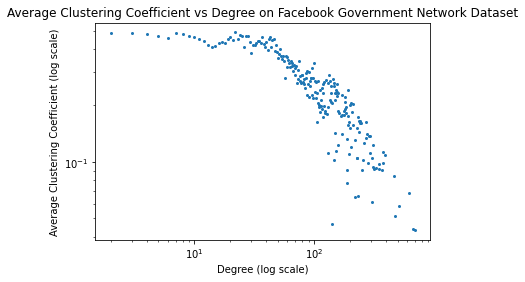

In [19]:
import numpy as np

degree_seq = list(dict(G.degree()).values())

# Create a list to store the mean clustering coefficient for each degree value
coef = nx.clustering(G)

# Create a list to store the mean clustering coefficient for each degree value
coef_d_list = []
for d in range(max(degree_seq)+1):
    mask = np.array(degree_seq) == d
    if sum(mask) > 0 and d > 1: 
        mean_coef = np.mean(np.array(list(coef.values()))[mask])
        coef_d_list.append((d, mean_coef))

# Extract x and y values for plotting
x, y = zip(*coef_d_list)

# Plot in log-log scale
plt.loglog(x, y, 'o', markersize=2)
plt.xlabel('Degree (log scale)')
plt.ylabel('Average Clustering Coefficient (log scale)')
plt.title('Average Clustering Coefficient vs Degree on Facebook Government Network Dataset')
plt.show()

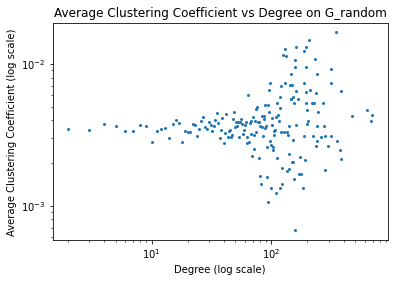

In [37]:
degree_seq_random = list(dict(G.degree()).values())

coef_random = nx.clustering(G_random)

coef_d_list_random = []
for d in range(max(degree_seq_random)+1):
    mask_random = np.array(degree_seq_random) == d
    if sum(mask_random) > 0 and d > 1: 
        mean_coef_random = np.mean(np.array(list(coef_random.values()))[mask_random])
        coef_d_list_random.append((d, mean_coef_random))

# Extract x and y values for plotting
x, y = zip(*coef_d_list_random)

# Plot in log-log scale
plt.loglog(x, y, 'o', markersize=2)
plt.xlabel('Degree (log scale)')
plt.ylabel('Average Clustering Coefficient (log scale)')
plt.title('Average Clustering Coefficient vs Degree on G_random')
plt.show()

##### Q6) Plot size of weekly connected components on x axis and count on y axis

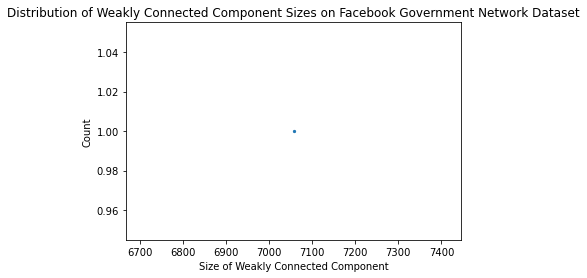

In [28]:
# Obtain the size of all weakly connected components
w_comp_sizes = [len(comp) for comp in nx.connected_components(G)]

# Count the distinct values of comp_sizes using Counter
w_comp_count = Counter(w_comp_sizes)

# Obtain the x and y values for plotting
x, y = zip(*w_comp_count.items())

# Plot the data points
plt.scatter(x, y, s=5)
plt.xlabel('Size of Weakly Connected Component')
plt.ylabel('Count')
plt.title('Distribution of Weakly Connected Component Sizes on Facebook Government Network Dataset')
plt.show()


In [31]:
print(nx.number_connected_components(G))


1


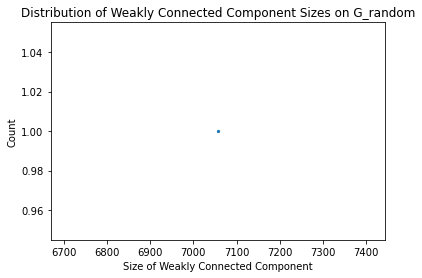

In [38]:
# Obtain the size of all weakly connected components
w_comp_sizes_random = [len(comp) for comp in nx.connected_components(G_random)]

# Count the distinct values of comp_sizes using Counter
w_comp_count_random = Counter(w_comp_sizes_random)

# Obtain the x and y values for plotting
x, y = zip(*w_comp_count_random.items())

# Plot the data points
plt.scatter(x, y, s=5)
plt.xlabel('Size of Weakly Connected Component')
plt.ylabel('Count')
plt.title('Distribution of Weakly Connected Component Sizes on G_random')
plt.show()
